# Exploratory Data Analysis

mostly done in another project (before this one)


# Code from before

we copy-paste here everything that seems worthwhile for the next phases

# DEDUPLICATION (ALREADY DONE)

# DROPPING DATAPOINTS (ALREADY DONE)

import packages : pandas

input file : final_cleaned_data.csv

stage 0 : typeconversion (all datatypes are either String or Int64)

stage 1 : drop all properties without prices or priced smaller than 25.000 €

stage 2 : drop all subtypes that are not houses or apartments

stage 3 : keep only properties with living area between 10 m² and 40.000 m²

stage 4 : drop all properties with terraces over 150m²

output file: filtered_final_cleaned_data.csv

# Clean and Load

In [2]:
import pandas as pd

def clean_and_load():

    df = pd.read_csv("../data/filtered_final_cleaned_data.csv")

    # converting float to int
    df = df.apply(lambda x: x.astype("Int64") if x.dtype == float and (x.dropna() % 1 == 0).all() else x)

    # converting objects to strings
    df['property_ID'] = df['property_ID'].astype('string')
    df['locality_name'] = df['locality_name'].astype('string')
    df['type'] = df['type'].astype('category')
    df['subtype'] = df['subtype'].astype('category')
    df['state_of_building'] = df['state_of_building'].astype('category')
    df['postal_code'] = df['postal_code'].astype('category')
    
    # removing properties that do not have the price
    df = df.dropna(subset=["price (€)"])
    
    return df

df = clean_and_load()

# --- Display results in notebook ---
display(df.dtypes)   # Shows column types


property_ID                      string[python]
locality_name                    string[python]
postal_code                            category
type                                   category
subtype                                category
price (€)                                 int64
number_of_bedrooms                        Int64
living_area (m²)                          int64
equiped_kitchen (yes:1, no:0)             int64
furnished (yes:1, no:0)                   int64
open_fire (yes:1, no:0)                   int64
terrace (yes:1, no:0)                     int64
terrace_area (m²)                         Int64
garden (yes:1, no:0)                      int64
number_facades                            Int64
swimming_pool (yes:1, no:0)               int64
state_of_building                      category
province                                 object
region                                   object
dtype: object

# missing values filtered dataset


In [3]:
import pandas as pd

df = pd.read_csv("../data/filtered_final_cleaned_data.csv")

# Check for missing values (FARANGES)
missing_data = df.isnull().sum()

# Put the missing values per column in percentage
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': (df.isnull().sum() / len(df)) * 100
})

# Round off the percentages
missing_summary['Percentage (%)'] = missing_summary['Percentage (%)'].round(0)
display(missing_summary)

,Missing Values,Percentage (%)
property_ID,0,0.0
locality_name,2328,16.0
postal_code,0,0.0
type,0,0.0
subtype,0,0.0
price (€),0,0.0
number_of_bedrooms,148,1.0
living_area (m²),0,0.0
"equiped_kitchen (yes:1, no:0)",0,0.0
"furnished (yes:1, no:0)",0,0.0


# CORRELATION ANALYSIS BETWEEN PRICE AND GDP PER CAPITA (PER PROVINCE)


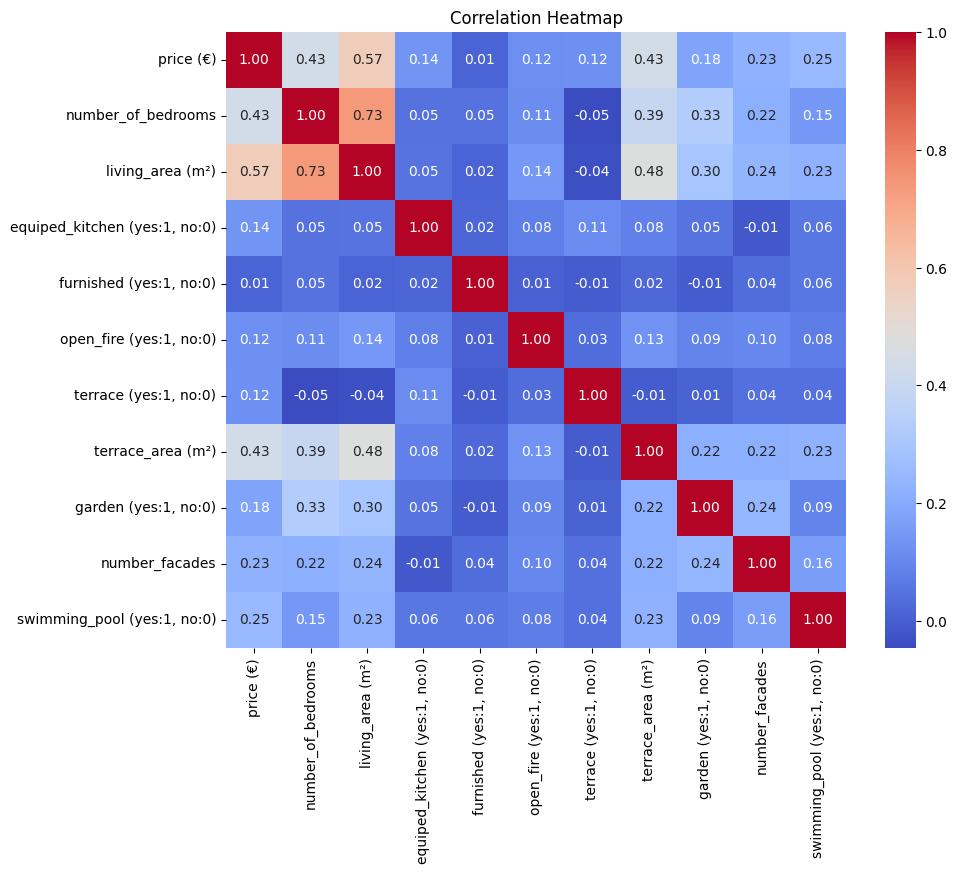

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation analysis:

"""Positive correlation (+1 for perfect correlation): the two variables change in the same direction.
Negative correlation (-1): the two variables change in opposite directions.
No correlation (0): there is no association or relevant relationship between the two variables."""

# Select numeric values
numeric_df = df.select_dtypes(include="number")

# Correlation matrix for numeric columns

corr_matrix = numeric_df.corr()
corr_matrix['price (€)'].sort_values(ascending=False)

# Visualize in a heatmap for the numeric columns (too dense)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
#Correlation between two numeric variables: property price and GDP ome per capita in €:
# Source for income per capita (gdp) per province in Belgium: Eurostat https://ec.europa.eu/eurostat/databrowser/view/tgs00003/default/table?lang=en

# dictionnary gdp per capita shown per province

gdp_per_province = {"Antwerp": 114382, 
            "East-Flanders": 74452, 
            "Limburg": 36726 , 
            "West-Flanders": 60931, 
            "Flemish-Brabant": 69558, 
            "Liège": 41196, 
            "Brabant-Wallon": 26475, 
            "Namur": 17623 ,
            "Hainaut": 42079,
            "Luxembourg": 9424,
            "Brussels": 103285}

# 1) Convert the dictionary to a DataFrame
gdp_df = pd.DataFrame(list(gdp_per_province.items()), columns=["province", "GDP"])

# 2️) Display the DataFrame to check it looks right
print(gdp_df)

# 3️) Save it as a CSV file
gdp_df.to_csv("gdp_per_province.csv", index=False)

print("CSV file 'gdp_per_province.csv' has been created!")

display(gdp_df)


           province     GDP
0           Antwerp  114382
1     East-Flanders   74452
2           Limburg   36726
3     West-Flanders   60931
4   Flemish-Brabant   69558
5             Liège   41196
6    Brabant-Wallon   26475
7             Namur   17623
8           Hainaut   42079
9        Luxembourg    9424
10         Brussels  103285
CSV file 'gdp_per_province.csv' has been created!


,province,GDP
0,Antwerp,114382
1,East-Flanders,74452
2,Limburg,36726
3,West-Flanders,60931
4,Flemish-Brabant,69558
5,Liège,41196
6,Brabant-Wallon,26475
7,Namur,17623
8,Hainaut,42079
9,Luxembourg,9424


In [6]:
"""We need to add a "province" column to our filtered_final_cleaned_data.csv file. 
Since we only have postal codes, we'll first need to map them to their provinces. 
We'll use a dictionary mapping postal codes to provinces."""

# Load data
df = pd.read_csv("filtered_final_cleaned_data.csv")

# Define postal code ranges per province
postal_to_province = {
    "Antwerp": range(2000, 3000),
    "East-Flanders": range(9000, 10000),
    "West-Flanders": range(8000, 9000),
    "Flemish-Brabant": list(range(1500, 2000)) + list(range(3000, 3500)),
    "Brussels": range(1000, 1300),
    "Limburg": range(3500, 4000),
    "Liège": range(4000, 5000),
    "Namur": range(5000, 6000),
    "Hainaut": list(range(6000, 6600)) + list(range(7000, 8000)),
    "Luxembourg": range(6600, 7000),
    "Brabant-Wallon": range(1300, 1500)
}

# Helper function to find province for each postal code
def get_province(postal_code):
    try:
        postal_code = int(postal_code)
        for province, codes in postal_to_province.items():
            if postal_code in codes:
                return province
        return "Unknown"
    except:
        return "Unknown"


# Apply the function to create a new column called "province" with the province names based on the postal codes.
df["province"] = df["postal_code"].apply(get_province)

print(df[["postal_code", "province"]].head())

# display(df.head())

# Save the updated dataset
df.to_csv("filtered_final_cleaned_data.csv", index=False)
print("New CSV saved with 'province' column!")

# Load the new dataset with province column
df = pd.read_csv("filtered_dataset_int.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'filtered_final_cleaned_data.csv'

In [ ]:
# Calculate the average price per province 

avg_price = df.groupby("province", as_index=False)["price (€)"].mean()
avg_price.rename(columns={"price (€)": "avg_price"}, inplace=True)
avg_price["avg_price"] = avg_price["avg_price"].round(0).astype(int)

display(avg_price)


# Merge with GDP dataset

gdp_df = pd.read_csv("gdp_per_province.csv")
df_merged = pd.merge(avg_price, gdp_df, on="province")

display(df_merged)

In [ ]:
# Check the correlation value between average price per province and gdp per province
corr_value = df_merged["avg_price"].corr(df_merged["GDP"])
print(f"Correlation between average property price per province and GDP per capita per province: {corr_value:.2f}")

In [ ]:
# Visualize the correlation between gdp per capita and price in scatter plot

import matplotlib.pyplot as plt

#Compute the correlation once
corr = df_merged["GDP"].corr(df_merged["avg_price"])

plt.figure(figsize=(10,7))
plt.scatter(df_merged["GDP"], df_merged["avg_price"], alpha=0.6, )  # alpha for transparency

# Add province names as labels
for i, row in df_merged.iterrows():
    plt.text(row["GDP"], row["avg_price"], row["province"], fontsize=9, ha='center', va='bottom')

plt.xlabel("GDP per capita per province (€)")
plt.ylabel("Average Property price (€)")
plt.title("Correlation between GDP per capita and Average Property Price per Province")
plt.grid(True,linestyle='--', alpha=0.5)

# Add correlation coefficient on the plot
plt.text(
    df_merged["GDP"].min(),
    df_merged["avg_price"].max() * 0.95,
    f"Correlation: {corr:.2f}",
    fontsize=12,
    color="red"
)
plt.show()

# Add a regression (trend) line for clarity to make the relationship clearer (and not just dots), use Seaborn’s regplot:
# the red trendline is showing the correlation, this highlights direction and strength of the correlation 

import seaborn as sns

plt.figure(figsize=(9, 6))
sns.regplot(
    data=df_merged,
    x="GDP",
    y="avg_price",
    scatter_kws={'alpha':0.7, 's':80},
    line_kws={'color':'red', 'lw':2}
)
plt.title("Correlation between GDP per Capita and Property Prices per Province", fontsize=14, weight='bold')

# Add province names as labels
for i, row in df_merged.iterrows():
    plt.text(row["GDP"], row["avg_price"], row["province"], fontsize=9, ha='center', va='bottom')

plt.xlabel("GDP per Capita (€) per province")
plt.ylabel("Average Property Price (€) per Province")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Add correlation coefficient on the plot
plt.text(
    df_merged["GDP"].min(),
    df_merged["avg_price"].max() * 0.95,
    f"Correlation: {corr:.2f}",
    fontsize=12,
    color="red"
)
plt.show()


In [ ]:
""" 2) Calculate stats per province: Average&median price and average&median price per m²:
This answers:
Most/least expensive province by average price
Most/least expensive province by median price
Most/least expensive province by price per m²"""

province_stats = df.groupby('province').agg({
    'price (€)': ['mean', 'median'],
    'price_per_m2': ['mean', 'median']
})

province_stats = province_stats.round(0).astype("Int64")              # Round the results to integers

province_stats.sort_values(('price (€)','mean'), ascending=False)     # Most expensive avg price
province_stats.sort_values(('price (€)','mean'), ascending=True)      # Least expensive avg price

province_stats.sort_values(('price (€)','median'), ascending=False)     # Most expensive median price
province_stats.sort_values(('price (€)','median'), ascending=True)      # Least expensive median price

province_stats.sort_values(('price_per_m2','mean'), ascending=False)
province_stats.sort_values(('price_per_m2','mean'), ascending=True)

display(province_stats.sort_values(('price (€)','mean'), ascending=False))

In [ ]:
"""4) Filter by region (Wallonia vs Flanders vs Brussels)"""

# Create a region column one time

df = pd.read_csv("filtered_final_cleaned_data.csv")

def get_region(province):
    flanders = ['Antwerp', 'Limburg', 'East-Flanders', 'West-Flanders', 'Flemish-Brabant']
    wallonia = ['Hainaut', 'Liège', 'Luxembourg', 'Namur', 'Brabant-Wallon']
    brussels = ['Brussels']

    if province in flanders:
        return 'Flanders'
    if province in wallonia:
        return 'Wallonia'
    return 'Brussels'

df['region'] = df['province'].apply(get_region)

df.to_csv("filtered_final_cleaned_data.csv", index=False)

# Stats per region

region_stats = df.groupby('region').agg({
    'price (€)': ['mean', 'median'],
    'price_per_m2': ['mean', 'median']
})

region_stats = region_stats.round(0).astype("Int64")  

display(region_stats)

"""Conclusion: Brussels is the region with the highest average prices and highest average price per m2 """

# Correlation Analysis and price comparison between different variables

In [10]:
import pandas as pd


def clean_and_load():

    df = pd.read_csv("../data/filtered_final_cleaned_data.csv")

    # converting float to int
    df = df.apply(lambda x: x.astype("Int64") if x.dtype == float and (x.dropna() % 1 == 0).all() else x)

    # converting objects to strings
    df['property_ID'] = df['property_ID'].astype('string')
    df['locality_name'] = df['locality_name'].astype('string')
    df['type'] = df['type'].astype('category')
    df['subtype'] = df['subtype'].astype('category')
    df['state_of_building'] = df['state_of_building'].astype('category')
    df['postal_code'] = df['postal_code'].astype('category')
    
    # removing properties that do not have the price
    df = df.dropna(subset=["price (€)"])
    #display(df.dtypes)
    df.to_csv("cleaned_data_int.csv", index=False)
    
    return df

df = clean_and_load()

# --- Display results in notebook ---
display(df.dtypes)   # Shows column types         

property_ID                      string[python]
locality_name                    string[python]
postal_code                            category
type                                   category
subtype                                category
price (€)                                 int64
number_of_bedrooms                        Int64
living_area (m²)                          int64
equiped_kitchen (yes:1, no:0)             int64
furnished (yes:1, no:0)                   int64
open_fire (yes:1, no:0)                   int64
terrace (yes:1, no:0)                     int64
terrace_area (m²)                         Int64
garden (yes:1, no:0)                      int64
number_facades                            Int64
swimming_pool (yes:1, no:0)               int64
state_of_building                      category
province                                 object
region                                   object
dtype: object

In [8]:
df = pd.read_csv("../data/filtered_final_cleaned_data.csv")
display(df.dtypes)

property_ID                       object
locality_name                     object
postal_code                        int64
type                              object
subtype                           object
price (€)                          int64
number_of_bedrooms               float64
living_area (m²)                   int64
equiped_kitchen (yes:1, no:0)      int64
furnished (yes:1, no:0)            int64
open_fire (yes:1, no:0)            int64
terrace (yes:1, no:0)              int64
terrace_area (m²)                float64
garden (yes:1, no:0)               int64
number_facades                   float64
swimming_pool (yes:1, no:0)        int64
state_of_building                 object
province                          object
region                            object
dtype: object

In [ ]:
def price_corr_postal_code():

    df = clean_and_load()
    
    # ANOVA: treats postal_code as categorical
    model = ols('Q("price (€)") ~ C(postal_code)', data=df).fit()
    anova_table = sm.stats.anova_lm(model)
    print(anova_table)  

    # Group by location to compute median price and count of listings
    median_price_by_location = df.groupby("postal_code", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_location["median_price"] = median_price_by_location["median_price"].round(2)

    # scatter plot
    fig = px.scatter(median_price_by_location, x="postal_code", y="median_price", size="num_listings", title="Price variation based on Postal Code", labels={"postal_code": "Postal Code", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.show()

    # print(median_price_by_location.head())
    return df

df = price_corr_postal_code()

# The F-statistic is 6.579, and p-value is essentially zero.
# This means there is a statistically significant difference in price across postal codes.

In [ ]:
def price_corr_number_of_bedrooms():
    df = clean_and_load()

    # Compute correlation between number of bedrooms and property price
    corr = df["number_of_bedrooms"].corr(df["price (€)"])
    print(f"Correlation between number of bedrooms and price: {corr:.2f}")

    # Group by number of bedrooms to compute median price and count of listings
    median_price_by_bedrooms = df.groupby("number_of_bedrooms", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_bedrooms["median_price"] = median_price_by_bedrooms["median_price"].round(2)

    # bar plot
    fig = px.bar(median_price_by_bedrooms, x="number_of_bedrooms", y="median_price", text="median_price", title="Price variation based on number of bedrooms", labels={"number_of_bedrooms": "Number of Bedrooms", "median_price": "Median Price (€)"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_bedrooms["median_price"].max()*1.1])
    fig.update_xaxes(dtick=1)
    fig.show()

    # print(median_price_by_bedrooms.head())
    return df

df = price_corr_number_of_bedrooms()
# print(df.columns.tolist())

In [ ]:
def price_corr_living_area():
    df = clean_and_load()

    # Compute correlation between living area and property price
    corr = df["living_area (m²)"].corr(df["price (€)"])
    print(f"Correlation between living area and price: {corr:.2f}")

    # Group by living area to compute median price and count of listings
    median_price_by_living_area = df.groupby("living_area (m²)", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_living_area["median_price"] = median_price_by_living_area["median_price"].round(2)

    # scatter plot
    fig = px.scatter(median_price_by_living_area, x="living_area (m²)", y="median_price", size="num_listings", trendline = "ols", title="Price variation based on living area (m²)", labels={"living_area (m²)": "Living area (m²)", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.show()

    print(median_price_by_living_area.head())
    return df

df = price_corr_living_area()
# print(df.columns.tolist())

In [ ]:
def price_corr_swimming_pool():
    df = clean_and_load()

    # Compute correlation between presence of swimming pool (yes:1, no:0) and property price
    corr = df["swimming_pool (yes:1, no:0)"].corr(df["price (€)"])
    print(f"Correlation between swimming pool and price: {corr:.2f}")
    df["swimming_pool_str"] = df["swimming_pool (yes:1, no:0)"].map({0: "No", 1: "Yes"})

    """ OTUCOME --> Houses with a swimming pool tend to be slightly more expensive on average, but the effect is not strong."""

    # Group by swimming pool presence to compute median price and count of listings
    median_price_by_swimming_pool = df.groupby("swimming_pool_str", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_swimming_pool["median_price"] = median_price_by_swimming_pool["median_price"].round(2)
    
    # bar plot
    fig = px.bar(median_price_by_swimming_pool, x="swimming_pool_str", y="median_price", color="num_listings", text="median_price", title="Price variation based on swimming pool", labels={"swimming_pool_str": "Swimming Pool", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_swimming_pool["median_price"].max()*1.1])
    fig.show()

    print(median_price_by_swimming_pool.head())
    return df

df = price_corr_swimming_pool()
# print(df.columns.tolist())

In [ ]:
def price_corr_garden():
    df = clean_and_load()

    # Compute correlation between presence of garden (yes:1, no:0) and property price
    corr = df["garden (yes:1, no:0)"].corr(df["price (€)"])
    print(f"Correlation between garden and price: {corr:.2f}")
    df["garden_str"] = df["garden (yes:1, no:0)"].map({0: "No", 1: "Yes"})

    """ OUTCOME: Houses with gardens tend to be slightly more expensive on average, but the effect is not strong."""
    
    # Group by garden presence to compute median price and count of listings
    median_price_by_garden = df.groupby("garden_str", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_garden["median_price"] = median_price_by_garden["median_price"].round(2)

    # bar plot
    fig = px.bar(median_price_by_garden, x="garden_str", y="median_price", color="num_listings", text="median_price", title="Price Variation by Garden Presence", labels={"garden_str": "Garden", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_garden["median_price"].max()*1.1])
    fig.show()

    print(median_price_by_garden.head())
    return df

df = price_corr_garden()
# print(df.columns.tolist())

In [11]:
def price_corr_number_of_facades():
    df = clean_and_load()

    # Compute correlation between number of facades and property price
    corr = df["number_facades"].corr(df["price (€)"])
    print(f"Correlation between number of facades and price: {corr:.2f}")
    
    # Group by number of bedrooms to compute median price and count of listings
    median_price_by_facades = df.groupby("number_facades", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_facades["median_price"] = median_price_by_facades["median_price"].round(2)

    # bar plot
    fig = px.bar(median_price_by_facades, x="number_facades", y="median_price", text="median_price", title="Price variation based on number facades", labels={"number_facades": "Number Facades", "median_price": "Median Price (€)"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_facades["median_price"].max()*1.1])
    fig.update_xaxes(dtick=1)
    fig.show()

    return df

df = price_corr_number_of_facades()

Correlation between number of facades and price: 0.23


NameError: name 'px' is not defined

In [ ]:
def price_corr_terrace_area():
    df = clean_and_load()

    # Compute correlation between terrace area and property price
    corr = df["terrace_area (m²)"].corr(df["price (€)"])
    print(f"Correlation between terrace area and price: {corr:.2f}")

    # Group by living area to compute median price and count of listings
    median_price_by_terrace_area = df.groupby("terrace_area (m²)", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_terrace_area["median_price"] = median_price_by_terrace_area["median_price"].round(2)

    # scatter plot
    fig = px.scatter(median_price_by_terrace_area, x="terrace_area (m²)", y="median_price", trendline = "ols", size="num_listings", title="Price variation based on terrace area", labels={"terrace_area (m²)": "Terrace area (m²)", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.show()

    return df

df = price_corr_terrace_area()

In [ ]:
def price_corr_terrace():
    df = clean_and_load()

    # Compute correlation between presence of terrace (yes:1, no:0) and property price
    corr = df["terrace (yes:1, no:0)"].corr(df["price (€)"])
    print(f"Correlation between terrace and price: {corr:.2f}")
    df["terrace_str"] = df["terrace (yes:1, no:0)"].map({0: "No", 1: "Yes"})

    """ OUTCOME: Houses with terraces tend to be slightly more expensive on average, but the effect is not strong."""

    # Group by terrace presence to compute median price and count of listings
    median_price_by_terrace = df.groupby("terrace_str", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_terrace["median_price"] = median_price_by_terrace["median_price"].round(2)

    # bar plot
    fig = px.bar(median_price_by_terrace, x="terrace_str", y="median_price", color="num_listings", text="median_price", title="Price Variation by Terrace Presence", labels={"terrace_str": "Terrace", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_terrace["median_price"].max()*1.1])
    fig.show()

    return df

df = price_corr_terrace()

In [ ]:
def price_corr_open_fire():
    df = clean_and_load()

    # Compute correlation between presence of open fire (yes:1, no:0) and property price
    corr = df["open_fire (yes:1, no:0)"].corr(df["price (€)"])
    print(f"Correlation between open fire and price: {corr:.2f}")
    df["open_fire_str"] = df["open_fire (yes:1, no:0)"].map({0: "No", 1: "Yes"})

    """ OUTCOME: Houses with open fire tend to be slightly more expensive on average, but the effect is not strong."""

    # Group by terrace presence to compute median price and count of listings
    median_price_by_open_fire = df.groupby("open_fire_str", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_open_fire["median_price"] = median_price_by_open_fire["median_price"].round(2)

    # bar plot
    fig = px.bar(median_price_by_open_fire, x="open_fire_str", y="median_price", color="num_listings", text="median_price", title="Price Variation by open fire", labels={"open_fire_str": "Open Fire", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_open_fire["median_price"].max()*1.1])
    fig.show()

    return df

df = price_corr_open_fire()

In [ ]:
def price_corr_furnished():
    df = clean_and_load()

    # Compute correlation between furnished property and property price
    corr = df["furnished (yes:1, no:0)"].corr(df["price (€)"])
    print(f"Correlation between furnished property and price: {corr:.2f}")
    df["furnished_str"] = df["furnished (yes:1, no:0)"].map({0: "No", 1: "Yes"})

    """ OUTCOME: A correlation that is close to zero suggests that — statistically —
    whether a property is furnished or not does not influence the price in the dataset."""

    # Group by terrace presence to compute median price and count of listings
    median_price_by_furnished = df.groupby("furnished_str", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_furnished["median_price"] = median_price_by_furnished["median_price"].round(2)

    # bar plot
    fig = px.bar(median_price_by_furnished, x="furnished_str", y="median_price", color="num_listings", text="median_price", title="Price Variation depending if the property is furnished", labels={"furnished_str": "Furnished", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_furnished["median_price"].max()*1.1])
    fig.show()

    return df

df = price_corr_furnished()


In [ ]:
def price_corr_equipped_kitchen():
    df = clean_and_load()

    # Compute correlation between equipped kitchen and property price
    corr = df["equiped_kitchen (yes:1, no:0)"].corr(df["price (€)"])
    print(f"Correlation between equipped kitchen and price: {corr:.2f}")
    df["equipped_kitchen_str"] = df["equiped_kitchen (yes:1, no:0)"].map({0: "No", 1: "Yes"})

    """ OUTCOME: A correlation that is close to zero suggests that — statistically — 
    whether a property has an equipped kitchen or not does not influence the price in the dataset"""

    # Group by terrace presence to compute median price and count of listings
    median_price_by_equipped_kitchen = df.groupby("equipped_kitchen_str", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_equipped_kitchen["median_price"] = median_price_by_equipped_kitchen["median_price"].round(2)

    # bar plot
    fig = px.bar(median_price_by_equipped_kitchen, x="equipped_kitchen_str", y="median_price", color="num_listings", text="median_price", title="Price Variation depending if the property has equipped kitchen", labels={"equipped_kitchen_str": "Equipped Kitchen", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_equipped_kitchen["median_price"].max()*1.1])
    fig.show()

    return df

df = price_corr_furnished()

In [ ]:
def price_corr_state_of_building():
    df = clean_and_load()
    
    # ANOVA: treats state of building as categorical
    model = ols('Q("price (€)") ~ C(state_of_building)', data=df).fit()
    anova_table = sm.stats.anova_lm(model)
    print(anova_table)

    """ The ANOVA shows that the state of the building has a highly significant effect on property price (p ≈ 2.3e-112). 
    However, the effect size is modest, meaning building condition explains only a small portion of the overall price variation."""  

    # Group by location to compute median price and count of listings
    median_price_by_state_of_building = df.groupby("state_of_building", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_state_of_building["median_price"] = median_price_by_state_of_building["median_price"].round(2)

    # bar plot
    fig = px.bar(median_price_by_state_of_building, x="state_of_building", y="median_price", color="num_listings", text="median_price", title="Price Variation depending on the state of building", labels={"state_of_building": "State of Building", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_state_of_building["median_price"].max()*1.1])
    fig.show()

    return df
df = price_corr_state_of_building()

In [ ]:
def price_corr_property_type():
    df = clean_and_load()
    
    # ANOVA: treats postal_code as categorical
    model = ols('Q("price (€)") ~ C(type)', data=df).fit()
    anova_table = sm.stats.anova_lm(model)
    print(anova_table)

    """ The ANOVA indicates that property type has a highly significant effect on price (p ≈ 1.06e-83), with a very large F-value showing strong differences between types. 
    However, despite this strong statistical significance, type still explains only part of the total price variability, with most variation coming from other factors."""  

    # Group by location to compute median price and count of listings
    median_price_by_property_type = df.groupby("type", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_property_type["median_price"] = median_price_by_property_type["median_price"].round(2)

    # bar plot
    fig = px.bar(median_price_by_property_type, x="type", y="median_price", color="num_listings", text="median_price", title="Price Variation depending on property type", labels={"type": "Type", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_property_type["median_price"].max()*1.1])
    fig.show()


    return df
df = price_corr_property_type()

In [ ]:
def price_corr_property_subtype():
    df = clean_and_load()
    
    # ANOVA: treats postal_code as categorical
    model = ols('Q("price (€)") ~ C(subtype)', data=df).fit()
    anova_table = sm.stats.anova_lm(model)
    print(anova_table)

    """ The ANOVA shows that property subtype has a highly significant effect on price (p ≈ 0.0), with a very large F-value indicating strong differences between subtypes. 
    Nevertheless, most of the overall price variation remains unexplained, meaning subtype is important but not the primary driver of price."""  

    # Group by location to compute median price and count of listings
    median_price_by_property_subtype = df.groupby("subtype", as_index=False).agg(median_price=("price (€)", "median"), num_listings=("price (€)", "count"))
    median_price_by_property_subtype["median_price"] = median_price_by_property_subtype["median_price"].round(2)

    # bar plot
    fig = px.bar(median_price_by_property_subtype, x="subtype", y="median_price", color="num_listings", text="median_price", title="Price Variation depending on property subtype", labels={"subtype": "Subtype", "median_price": "Median Price (€)", "num_listings": "Number of Listings"})
    fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
    fig.update_yaxes(range=[0, median_price_by_property_subtype["median_price"].max()*1.1])
    fig.show()


    return df
df = price_corr_property_subtype()

Conclusion: 
Top 5 mst important variables influencing the price: 
- Living area (corr. = **0.57**)
- Number of Bedrooms (corr. = **0.43**)
- Terrace area (corr. = **0.43**)
- Swimming pool (corr. = **0.25**)
- Number of facades (corr. = **0.23**)

# More correlation stuff

In [ ]:
import numpy as np


# 3. Functions for calculating correlation
# Eta_squared: Numerical vs Categorical
def encode_binary(series):
    if series.nunique() != 2:
        return series
    classes = list(series.unique())
    mapping = {classes[0]: 0, classes[1]: 1}
    return series.map(mapping)

""" def eta_squared(df, numerical, categorical):
    groups = df.groupby(categorical)[numerical]
    ss_between = sum([len(g) * (g.mean() - df[numerical].mean())**2 for name, g in groups])
    ss_total = sum((df[numerical] - df[numerical].mean())**2)
    return ss_between / ss_total if ss_total != 0 else 0"""
def eta_squared(df, categorical, numerical):
    data = df[[categorical, numerical]].dropna()
    # если нет данных — нет связи
    if data.empty:
        return np.nan
    # если категория одна — дисперсия между группами 0
    if data[categorical].nunique() < 2:
        return 0.0
    overall_mean = data[numerical].mean()

    ss_between = 0
    for cat, g in data.groupby(categorical):
        if g[numerical].count() == 0:
            continue
        ss_between += len(g) * (g[numerical].mean() - overall_mean) ** 2

    ss_total = ((data[numerical] - overall_mean) ** 2).sum()

    if ss_total == 0:
        return 0.0
    return ss_between / ss_total

# Сramers_v: Categorical vs Binary
def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency)
    n = contingency.sum().sum()
    r, k = contingency.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# phi_coefficient: Binary vs Binary
def phi_coefficient(x, y):
    contingency = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency)
    n = contingency.to_numpy().sum()
    return np.sqrt(chi2 / n)

# Spearman: Numerical vs Numerical
def safe_spearman(a, b):
    a_num = pd.to_numeric(a, errors='coerce')
    b_num = pd.to_numeric(b, errors='coerce')
    mask = a_num.notna() & b_num.notna()
    if mask.sum() < 3:
        return np.nan
    val, _ = spearmanr(a_num[mask], b_num[mask])
    return val

# Point-Biserial: Numerical vs Binary
def safe_pointbiserial(numeric, binary):
    numeric = pd.to_numeric(numeric, errors='coerce')
    binary = pd.to_numeric(binary, errors='coerce')
    mask = numeric.notna() & binary.notna()
    if mask.sum() < 3:
        return np.nan
    try:
        val, _ = pointbiserialr(numeric[mask], binary[mask])
        return val
    except Exception:
        return np.nan

In [14]:
# 4. Construction of a “mixed correlation matrix”qq
def correlation_value(x, y, type_x, type_y):
    try:
        # numerical-numerical
        if type_x == "numerical" and type_y == "numerical":
            return safe_spearman(x, y)

        # numerical-binary
        if type_x == "binary" and type_y == "numerical":
            return safe_pointbiserial(encode_binary(x), y)

        if type_x == "numerical" and type_y == "binary":
            return safe_pointbiserial(x, encode_binary(y))

        # numerical-categorical
        if type_x == "numerical" and type_y == "categorical":
            return eta_squared(df, y.name, x.name)

        if type_x == "categorical" and type_y == "numerical":
            return eta_squared(df, x.name, y.name)

        # binary-binary
        if type_x == "binary" and type_y == "binary":
            return phi_coefficient(x, y)

        # categorical-categorical
        if type_x == "categorical" and type_y == "categorical":
            return cramers_v(x, y)

        # categorical-categorical
        if type_x == "categorical" and type_y == "binary":
            return cramers_v(x, encode_binary(y))
        if type_x == "binary" and type_y == "categorical":
            return cramers_v(encode_binary(x), y)

    except Exception:
        return np.nan

    return np.nan

columns = df.columns
corr_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

for col1 in columns:
    for col2 in columns:
        t1 = column_types[col1]
        t2 = column_types[col2]
        corr_matrix.loc[col1, col2] = correlation_value(df[col1], df[col2], t1, t2)

# ensure numeric values; coerce errors to NaN
corr_matrix = corr_matrix.apply(pd.to_numeric, errors='coerce')

print("Mixed correlation matrix:")
print(corr_matrix) 

NameError: name 'column_types' is not defined

In [ ]:
# 5. Visualization of a mixed matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix.astype(float), annot=False, cmap="coolwarm", center=0)
plt.title("Mixed Correlation Matrix (Numerical + Categorical + Binary)")
plt.tight_layout()
plt.show()

In [ ]:
# 6. Top 5 Strongest Relationships
# Convert the matrix to long format
corr_long = (
    corr_matrix.stack()
    .reset_index()
)
corr_long.columns = ["col1", "col2", "corr"]

# We remove pairs with ourselves
corr_long = corr_long[corr_long["col1"] != corr_long["col2"]]

# Remove duplication (A,B) and (B,A)
corr_long["pair"] = corr_long.apply(lambda row: tuple(sorted([row["col1"], row["col2"]])), axis=1)
corr_long = corr_long.drop_duplicates(subset="pair")

# Sort by connection strength (by modulus)
corr_long["abs_corr"] = corr_long["corr"].abs()
top5 = corr_long.sort_values("abs_corr", ascending=False).head(5)

print("\nTOP 5 strongest connections:")
print(top5[["col1", "col2", "corr"]])

In [ ]:
# 4. Construction of a “correlation vector” with "price (€)"
def correlation_value(x, y, type_x, type_y):
    try:
        # numerical-numerical
        if type_x == "numerical" and type_y == "numerical":
            return safe_spearman(x, y)

        # numerical-binary
        if type_x == "binary" and type_y == "numerical":
            return safe_pointbiserial(encode_binary(x), y)
        if type_x == "numerical" and type_y == "binary":
            return safe_pointbiserial(x, encode_binary(y))

        # numerical-categorical
        if type_x == "numerical" and type_y == "categorical":
            return eta_squared(df, x.name, y.name)

        if type_x == "categorical" and type_y == "numerical":
            return eta_squared(df, y.name, x.name)

        # binary-binary
        if type_x == "binary" and type_y == "binary":
            return phi_coefficient(x, y)

        # categorical-categorical
        if type_x == "categorical" and type_y == "categorical":
            return cramers_v(x, y)

    except Exception:
        return np.nan

    return np.nan

columns = df.columns

target = "price (€)"           # field to compare with
corr_vector = {}               # Let's add the correlations here

for col in df.columns:
    if col == target:
        continue
    t1 = column_types[col]
    t2 = column_types[target]
    corr_vector[col] = correlation_value(df[col], df[target], t1, t2)

corr_vector = pd.Series(corr_vector).sort_values(ascending=False)

print("\nMixed correlation vector with target:", target)
# print(corr_vector)
print(corr_vector.abs().sort_values(ascending=False))

In [ ]:
# 5. Visualization of a mixed matrix
plt.figure(figsize=(6, 12))

# seaborn heatmap expects a 2D matrix → convert Series to DataFrame
corr_df = corr_vector.to_frame(name="correlation")

ax = sns.heatmap(
    corr_df,
    annot=True,
    cmap="coolwarm",
    center=0,
    cbar=True,
    cbar_kws={"orientation": "horizontal"}
)

plt.title(f"Correlation with {target}", pad=50)

# Get existing colorbar
cbar = ax.collections[0].colorbar

# Move ticks to the top of colorbar
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.tick_top()

# Reposition colorbar under the title
bbox = ax.get_position()
cbar.ax.set_position([bbox.x0, bbox.y1 + 0.03, bbox.width, 0.02])

ax.set_xlabel("")
ax.set_ylabel("Features")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for colorbar and title

plt.show()

# extra research (correlation price - state of building) 

we ask ourselves does the correlation go up if we melt some categories into a few

In [17]:
df["state_of_building"].unique().tolist()

['Excellent',
 'To be renovated',
 nan,
 'New',
 'Normal',
 'Fully renovated',
 'To renovate',
 'Under construction',
 'To demolish',
 'To restore']

In [20]:
# Treat NaN as its own category
df['state_of_building'] = df['state_of_building'].astype('category')

if 'missing' not in df['state_of_building'].cat.categories:
    df['state_of_building'] = df['state_of_building'].cat.add_categories(['missing'])

df['state_of_building'] = df['state_of_building'].fillna('missing')

# one-hot encode the categorical variable
dummies = pd.get_dummies(df['state_of_building'], drop_first=False)

# compute correlation with price
corr = dummies.apply(lambda x: x.corr(df['price (€)']))

print(corr)

Excellent             0.177926
Fully renovated       0.004185
New                   0.009011
Normal               -0.013319
To be renovated      -0.099519
To demolish          -0.002753
To renovate          -0.034476
To restore            0.006408
Under construction   -0.010608
missing              -0.043600
dtype: float64


In [21]:
import numpy as np

def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)

    cat_uniques = np.unique(categories)

    means = []
    n = []
    for cat in cat_uniques:
        vals = values[categories == cat]
        means.append(np.mean(vals))
        n.append(len(vals))

    overall_mean = np.mean(values)

    # between-group variance
    ss_between = np.sum(n * (means - overall_mean)**2)

    # total variance
    ss_total = np.sum((values - overall_mean)**2)

    eta = np.sqrt(ss_between / ss_total)
    return eta

eta = correlation_ratio(df['state_of_building'], df['price (€)'])
print("Correlation ratio (η):", eta)

Correlation ratio (η): 0.20230395612580238


we try to convert state of building in 3 categories and test corr again , if it does not get better we might drop it later

In [23]:
"""convert categories of state of building"""

# Create a state of building grouped column one time called Building_Quality

df = pd.read_csv("../data/filtered_final_cleaned_data_province.csv")

def get_new_categories(building):
    top = ['Excellent', 'Fully renovated', 'New', "Normal"]
    medium = ['Under construction', 'To be renovated', 'To renovate', 'To restore']
    bottom = ['missing', "To demolish"]

    if building in top:
        return 'Top Quality'
    if building in medium:
        return 'Medium Quality'
    return 'Low Quality'

df['Building_Quality'] = df['state_of_building'].apply(get_new_categories)

df.to_csv("../data/filtered_final_cleaned_data_province_quality.csv", index=False)

rerun the corr research on the new colum Building_quality

In [24]:
# one-hot encode the categorical variable
dummies = pd.get_dummies(df['Building_Quality'], drop_first=False)

# compute correlation with price
corr = dummies.apply(lambda x: x.corr(df['price (€)']))

print(corr)

Low Quality      -0.043700
Medium Quality   -0.105422
Top Quality       0.109547
dtype: float64


In [25]:
import numpy as np

def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)

    cat_uniques = np.unique(categories)

    means = []
    n = []
    for cat in cat_uniques:
        vals = values[categories == cat]
        means.append(np.mean(vals))
        n.append(len(vals))

    overall_mean = np.mean(values)

    # between-group variance
    ss_between = np.sum(n * (means - overall_mean)**2)

    # total variance
    ss_total = np.sum((values - overall_mean)**2)

    eta = np.sqrt(ss_between / ss_total)
    return eta

eta = correlation_ratio(df['Building_Quality'], df['price (€)'])
print("Correlation ratio (η):", eta)

Correlation ratio (η): 0.12307540385019561
